In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:/Users/akshason/Desktop/creditcard.csv')
df.isnull().values.any()

False

In [3]:
df_dep=df.drop(columns='Class',axis=1)
df_ind=df['Class']

In [4]:
df_ind.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

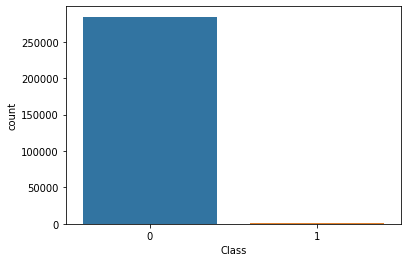

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df_ind)

In [8]:
from imblearn.under_sampling import NearMiss

In [9]:
us=NearMiss()
x_new,y_new=us.fit_sample(df_dep,df_ind)
x_new.shape,y_new.shape

((984, 30), (984,))

In [10]:
y_new.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [11]:
# After under_sampling checkig Model Efficiencty by knn
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn=KNeighborsClassifier()

In [13]:
knn.fit(df_dep,df_ind)

KNeighborsClassifier()

In [15]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,x_new,y_new,cv=10,scoring='accuracy')
score.mean()
# With Df_dep,df_ind, it went stuck

0.8039064110492682

In [56]:
# Now Sampling with OverSampling Method
from imblearn.combine import SMOTETomek

In [67]:
os=SMOTETomek()
x_new,y_new=os.fit_sample(df_dep,df_ind)
x_new.shape,y_new.shape
# Not wokring it

KeyboardInterrupt: 

In [16]:
from imblearn.over_sampling import RandomOverSampler

In [17]:
os=RandomOverSampler(sampling_strategy=1)

In [18]:
x_new,y_new=os.fit_sample(df_dep,df_ind)

In [19]:
x_new.shape,y_new.shape

((568630, 30), (568630,))

In [20]:
knn.fit(x_new,y_new)

KNeighborsClassifier()

In [21]:
knn.predict(x_new)

KeyboardInterrupt: 

In [19]:
score=cross_val_score(knn,x_new,y_new,cv=10,scoring='accuracy')

KeyboardInterrupt: 

In [16]:
from sklearn.cluster import KMeans

In [19]:
km=KMeans(n_clusters=8)

In [20]:
km.fit(x_new,y_new)

KMeans()

In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(km,x_new,y_new,cv=10,scoring='accuracy')
score.mean()

0.07006802721088436